In [1]:
import json
import boto3
import fsspec
import numpy as np
import xarray as xr
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
from dash import dcc
import plotly.express as px
from datetime import datetime
import os

In [2]:
sts = boto3.client('sts')

assumed_role = sts.assume_role(
    RoleArn='arn:aws:iam::690817015997:role/nasa-power-s3-access-role',
    RoleSessionName='NasaPowerDataExplorationSession2'  # Provide a session name
)

# Extract temporary credentials from the assumed role response
credentials = assumed_role['Credentials']

In [3]:
aws_access_key_id = credentials['AccessKeyId']
aws_secret_access_key = credentials['SecretAccessKey']
aws_session_token=credentials['SessionToken']

s3_client = boto3.client('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key
                         , aws_session_token = aws_session_token)
s3_resource = boto3.resource('s3', aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key
                         , aws_session_token = aws_session_token)


#bucket_contents = s3_client.list_objects_v2(Bucket='power-analysis-ready-datastore')
#bucket_contents = s3_client.list_objects_v2(Bucket='nasa-power-combined-data')

#list_of_objs_in_bucket = bucket_contents['Contents']
#print(len(list_of_objs_in_bucket))

In [12]:
bucket_contents = s3_client.list_objects_v2(Bucket='power-analysis-ready-datastore')

list_of_objs_in_bucket = bucket_contents['Contents']
date_format = "%Y/%m/%d"
oldest_date = datetime.today().date()

for i in range(len(list_of_objs_in_bucket)):
    # print(list_of_objs_in_bucket[i]['Key'])
    if 'json' in list_of_objs_in_bucket[i]['Key']:
        print(list_of_objs_in_bucket[i]['Key'])
        s3_client.download_file('power-analysis-ready-datastore', list_of_objs_in_bucket[i]['Key'], list_of_objs_in_bucket[i]['Key'])
        with open(list_of_objs_in_bucket[i]['Key'], 'r') as f:
            json_data = json.load(f)
            print(json_data)
            if list_of_objs_in_bucket[i]['Key'] != 'extra_processing_allowed.json':
                data_refresh_date = datetime.strptime(json_data['last'], date_format).date()
                if data_refresh_date < oldest_date:
                    oldest_date = data_refresh_date
                    # print(list_of_objs_in_bucket[i]['Key'])
                    # print(oldest_date)

print(oldest_date)

ceres.json
{'last': '2023/11/01'}
extra_last_data_processing.json
{'last': '2023/03/21'}
extra_last_data_sync.json
{'last': '2023/03/22'}
extra_processing_allowed.json
{'status': False}
flashflux.json
{'last': '2024/02/12'}
geos5124.json
{'last': '2024/02/14'}
imerg-final.json
{'last': '2021/09/30'}
imerg-late.json
{'last': '2023/03/20'}
last_data_processing.json
{'last': '2024/02/16'}
last_data_sync.json
{'last': '2024/02/17'}
merra2.json
{'last': '2023/11/01'}
2021-09-30


In [4]:
filepath = 'https://power-analysis-ready-datastore.s3.amazonaws.com/power_901_daily_meteorology_utc.zarr'
filepath_mapped = fsspec.get_mapper(filepath)

ds_daily = xr.open_zarr(store=filepath_mapped, consolidated=True)

/Users/sumangangopadhyay/nasa-power-data-exploration/nasa_power_venv/lib/python3.8/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
ds_daily

<xarray.Dataset>
Dimensions:      (time: 16071, lat: 361, lon: 576)
Coordinates:
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time         (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2024-12-31
Data variables: (12/66)
    CDD0         (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    CDD10        (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    CDD18_3      (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    DISPH        (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    EVLAND       (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    EVPTRNS      (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    ...           ...
    WS2M_RANGE   (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    WS50M        (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    WS50M_MAX    (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    WS50M_MIN    (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    WS50M_RANGE  (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
    Z0M          (time, lat, lon) float64 dask.array<chunksize=(14610, 5, 5), meta=np.ndarray>
Attributes: (12/37)
    acknowledgement:            The Prediction of Worldwide Energy Resources ...
    comment:                    Version 9.0.1 includes source data resolution.
    conventions:                CF-1.8, ACDD-1.3
    creator_email:              bradley.macpherson@nasa.gov
    creator_name:               Bradley Macpherson
    date_created:               2021-06-16T10:30:00.000000
    ...                         ...
    time_coverage_end:          2024-12-31T00:00:00
    time_coverage_resolution:   P1D
    time_coverage_start:        1981-01-01T00:00:00
    time_standard:              Universal Time Coordinated (UTC)
    title:                      POWER Daily Meteorologging_Functiony Time Series
    version:                    POWER Version 9.0.1

In [6]:
kol_daily_dask_df = ds_daily.sel(lat=22, lon=87.5).to_dask_dataframe()
kol_daily_dask_df = kol_daily_dask_df.dropna()
local_path = '/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/kolkata_901_daily_meteorology_utc_dask'
kol_daily_dask_df.to_parquet(local_path)

In [7]:
for file in os.listdir(local_path):
    print(file)
    local_path_to_file = "/".join([local_path, file])
    print(local_path_to_file)
    s3_client.upload_file(local_path_to_file, 'nasa-power-combined-data', file)

part.0.parquet
/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/kolkata_901_daily_meteorology_utc_dask/part.0.parquet
part.1.parquet
/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/kolkata_901_daily_meteorology_utc_dask/part.1.parquet


In [8]:
bucket_contents = s3_client.list_objects_v2(Bucket='nasa-power-combined-data')
list_of_objs_in_bucket = bucket_contents['Contents']
download_path_local_root = '/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/s3_downloads'
for i in range(len(list_of_objs_in_bucket)):
    print(list_of_objs_in_bucket[i]['Key'])
    download_path_local = "/".join([download_path_local_root,list_of_objs_in_bucket[i]['Key']])
    print(download_path_local)
    s3_client.download_file('nasa-power-combined-data', list_of_objs_in_bucket[i]['Key'], download_path_local)

part.0.parquet
/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/s3_downloads/part.0.parquet
part.1.parquet
/Users/sumangangopadhyay/nasa-power-data-exploration/files_for_s3_upload/s3_downloads/part.1.parquet


In [9]:
df = pd.read_parquet(download_path_local_root)

In [10]:
df.shape

(15645, 69)

In [11]:
df.tail(5)

,time,lat,lon,CDD0,CDD10,CDD18_3,DISPH,EVLAND,EVPTRNS,FROST_DAYS,...,WS10M_RANGE,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,Z0M
__null_dask_index__,,,,,,,,,,,,,,,,,,,,,
15640,2023-10-28,22.0,87.5,23.8125,13.8125,5.5000,0.179688,0.000048,28.609375,0.0,...,0.609375,1.898438,2.507812,1.429688,1.070312,3.960938,5.109375,2.921875,2.187500,0.035156
15641,2023-10-29,22.0,87.5,23.4375,13.4375,5.1250,0.179688,0.000047,29.156250,0.0,...,1.914062,1.765625,3.101562,1.234375,1.867188,3.273438,5.156250,2.625000,2.531250,0.035156
15642,2023-10-30,22.0,87.5,24.1250,14.1250,5.8125,0.179688,0.000044,28.406250,0.0,...,2.156250,1.640625,2.820312,0.898438,1.921875,2.953125,4.390625,1.726562,2.664062,0.035156
15643,2023-10-31,22.0,87.5,24.0000,14.0000,5.6875,0.179688,0.000046,29.445312,0.0,...,2.289062,2.117188,3.312500,1.140625,2.164062,4.117188,6.656250,2.515625,4.140625,0.035156
15644,2023-11-01,22.0,87.5,24.8750,14.8750,6.5625,0.179688,0.000042,26.406250,0.0,...,3.171875,1.953125,3.656250,1.007812,2.648438,3.632812,6.390625,2.093750,4.304688,0.035156


In [13]:
df.columns

Index(['time', 'lat', 'lon', 'CDD0', 'CDD10', 'CDD18_3', 'DISPH', 'EVLAND',
       'EVPTRNS', 'FROST_DAYS', 'FRSEAICE', 'FRSNO', 'GWETPROF', 'GWETROOT',
       'GWETTOP', 'HDD0', 'HDD10', 'HDD18_3', 'PBLTOP', 'PRECSNOLAND',
       'PRECTOTCORR', 'PS', 'QV10M', 'QV2M', 'RH2M', 'RHOA', 'SLP', 'SNODP',
       'T10M', 'T10M_MAX', 'T10M_MIN', 'T10M_RANGE', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TO3', 'TQV', 'TROPPB', 'TROPQ',
       'TROPT', 'TS', 'TS_MAX', 'TS_MIN', 'TS_RANGE', 'U10M', 'U2M', 'U50M',
       'V10M', 'V2M', 'V50M', 'WD10M', 'WD2M', 'WD50M', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS2M', 'WS2M_MAX', 'WS2M_MIN',
       'WS2M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'Z0M'],
      dtype='object')

### Target Variable -> CDD10
#### Attempting to visualise variation of target variable with the rest of the attributes

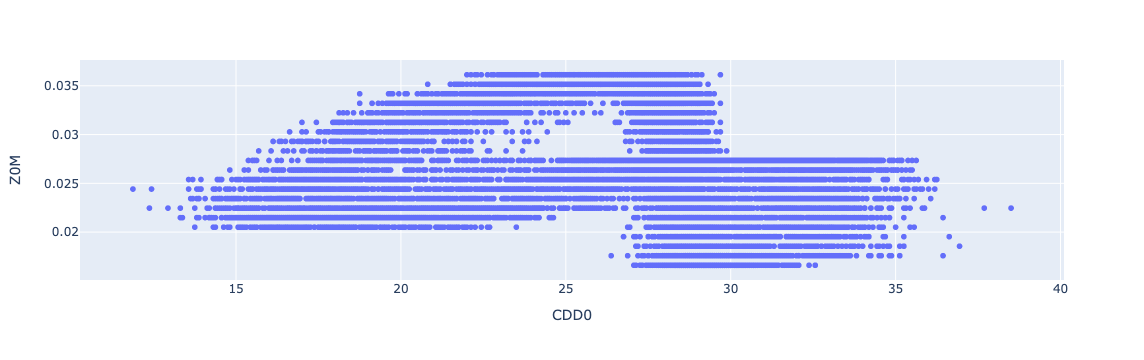

In [82]:
fig = px.scatter(df, x='CDD0', y="Z0M")
fig.show()

### Conclusions
#### HDD0, HDD10, FROST_DAYS, FRSEAICE, FRSNO, PRECSNOLAND, SNODP can be dropped as they remain constant and CDD10, CDD18_3 & HDD18_3, T2MDEW, T2M_MAX, T2M_MIN, TS_MIN, V10M, V2M have linear correlation with the target variable.
#### QV10M, QV2M, RH2M, T10M_RANGE, T2M_RANGE, TO3, TQV, TS_MAX, TS_RANGE, U10M, U2M, U50M, V50M, WS10M, WS10M_MAX, WS10M_MIN, WS10M_RANGE, WS2M, WS2M_MAX, WS2M_MIN, WS2M_RANGE, WS50M, WS50M_MAX, WS50M_MIN, WS50M_RANGE have slightly complex linear relationship (higher order polynomials)
#### HDD18_3 has an inverse correlation, PBLTOP, PS, SLP also seems to have slight inverse correlation
#### RHOA has a clear inverse linear correlation
#### T10M, T10M_MAX, T10M_MIN, T2M, T2MWET, TS have clear linear correlation
#### DISPH(need to revisit), TROPPB, TROPQ, TROPT, WD10M, WD2M, WD50M, Z0M(need to revisit) doesn't seem to have any correlation